In [36]:
import pandas as pd
import numpy as np

In [37]:
data = pd.read_csv('../sale-prediction/data.csv')
data.head()

,date_block_num,shop_id,item_id,item_cnt_month,month,city,item_category_id
0,0,2,19,0.0,0,Adygea,40
1,0,3,19,0.0,0,Balashikha,40
2,0,4,19,0.0,0,Volzhsky,40
3,0,6,19,0.0,0,Voronezh,40
4,0,7,19,0.0,0,Voronezh,40


In [38]:
def lag_feature(df, lags, col):
    tmp = df[['date_block_num', 'shop_id', 'item_id', col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num', 'shop_id', 'item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num', 'shop_id', 'item_id'], how='left')
    return df

In [39]:
data = lag_feature(data, [1,2,3,6,12], 'item_cnt_month')
data

,date_block_num,shop_id,item_id,item_cnt_month,month,city,item_category_id,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12
0,0,2,19,0.0,0,Adygea,40,NaN,NaN,NaN,NaN,NaN
1,0,3,19,0.0,0,Balashikha,40,NaN,NaN,NaN,NaN,NaN
2,0,4,19,0.0,0,Volzhsky,40,NaN,NaN,NaN,NaN,NaN
3,0,6,19,0.0,0,Voronezh,40,NaN,NaN,NaN,NaN,NaN
4,0,7,19,0.0,0,Voronezh,40,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11128045,34,49,12470,NaN,10,Tyumen,58,NaN,NaN,NaN,NaN,NaN
11128046,34,39,12470,NaN,10,RostovNaDon,58,NaN,NaN,NaN,NaN,NaN
11128047,34,48,12470,NaN,10,Tomsk,58,NaN,NaN,NaN,NaN,NaN
11128048,34,34,12470,NaN,10,N.Novgorod,58,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,date_block_num,shop_id,item_id,item_cnt_month,month,item_category_id,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12
count,1.112805e+07,1.112805e+07,1.112805e+07,1.091385e+07,1.112805e+07,1.112805e+07,8.629143e+06,7.989211e+06,7.379083e+06,5.742261e+06,3.139542e+06
mean,1.533958e+01,3.138372e+01,1.130368e+04,3.342731e-01,5.268734e+00,4.494411e+01,4.079916e-01,4.235900e-01,4.399648e-01,4.897250e-01,5.854341e-01
std,9.760396e+00,1.730666e+01,6.210930e+03,3.417243e+00,3.418489e+00,1.514009e+01,3.671540e+00,3.630783e+00,3.744414e+00,4.047476e+00,4.621250e+00
min,0.000000e+00,2.000000e+00,0.000000e+00,-2.200000e+01,0.000000e+00,0.000000e+00,-2.200000e+01,-2.200000e+01,-4.000000e+00,-4.000000e+00,-4.000000e+00
25%,7.000000e+00,1.600000e+01,5.947000e+03,0.000000e+00,2.000000e+00,3.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.500000e+01,3.100000e+01,1.138800e+04,0.000000e+00,5.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.300000e+01,4.700000e+01,1.659200e+04,0.000000e+00,8.000000e+00,5.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.400000e+01,5.900000e+01,2.216900e+04,2.253000e+03,1.100000e+01,8.300000e+01,2.253000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03


In [7]:
import lightgbm
import time

In [10]:
for i in range(7,12):
    data.iloc[:,i].fillna(0,inplace=True)
data

,date_block_num,shop_id,item_id,item_cnt_month,month,city,item_category_id,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12
0,0,2,19,0.0,0,Adygea,40,0.0,0.0,0.0,0.0,0.0
1,0,3,19,0.0,0,Balashikha,40,0.0,0.0,0.0,0.0,0.0
2,0,4,19,0.0,0,Volzhsky,40,0.0,0.0,0.0,0.0,0.0
3,0,6,19,0.0,0,Voronezh,40,0.0,0.0,0.0,0.0,0.0
4,0,7,19,0.0,0,Voronezh,40,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11128045,34,49,12470,NaN,10,Tyumen,58,0.0,0.0,0.0,0.0,0.0
11128046,34,39,12470,NaN,10,RostovNaDon,58,0.0,0.0,0.0,0.0,0.0
11128047,34,48,12470,NaN,10,Tomsk,58,0.0,0.0,0.0,0.0,0.0
11128048,34,34,12470,NaN,10,N.Novgorod,58,0.0,0.0,0.0,0.0,0.0


In [12]:
city_label={}
cities = data.city.unique()
for i, v in enumerate(cities):
    city_label[v] = i

city_labels = pd.DataFrame.from_dict(city_label,orient='index').reset_index()
city_labels.columns = ['city', 'city_id']
data = data.merge(city_labels, on='city')
data.drop('city', axis=1, inplace=True)
data

,date_block_num,shop_id,item_id,item_cnt_month,month,item_category_id,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,city_num
0,0,2,19,0.0,0,40,0.0,0.0,0.0,0.0,0.0,0
1,0,2,27,1.0,0,19,0.0,0.0,0.0,0.0,0.0,0
2,1,2,27,0.0,1,19,1.0,0.0,0.0,0.0,0.0,0
3,2,2,27,0.0,2,19,0.0,1.0,0.0,0.0,0.0,0
4,3,2,27,0.0,3,19,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11128045,27,33,21482,0.0,3,64,0.0,0.0,0.0,0.0,0.0,30
11128046,27,33,21656,0.0,3,40,0.0,0.0,0.0,0.0,0.0,30
11128047,27,33,21657,0.0,3,37,0.0,0.0,0.0,0.0,0.0,30
11128048,27,33,21698,0.0,3,40,0.0,0.0,0.0,0.0,0.0,30


In [17]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'],axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [31]:
# kaggle スタートブックより写経
ts=time.time()

categorical_features = ['shop_id', 'item_id', 'item_category_id', 'city_num', 'month', 'date_block_num']
lgb_train = lightgbm.Dataset(X_train, Y_train,
                             categorical_feature=categorical_features)
lgb_eval = lightgbm.Dataset(X_valid, Y_valid,
                            categorical_feature=categorical_features)
#https://www.kaggle.com/koyohoriuchi/starter-code-with-feature-eng-and-lgbm-lb-0-899/edit
params = {'objective' : 'regression',
          'metric' : 'rmse',
          'n_estimators' : 1000,
          'early_stopping_rounds': 50,
          'learning_rate' : 0.05,
          'max_depth' : 9,
          }

model = lightgbm.train(params, lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                  verbose_eval=1000)

time.time() - ts

C:\Users\user\Anaconda\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\Anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\Anaconda\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	training's rmse: 1.8539	valid_1's rmse: 4.56197


65.44788885116577

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error
va_pred = model.predict(X_valid)
score = np.sqrt(mean_squared_error(Y_valid, va_pred))
score

4.547881921555268

In [33]:
test = pd.read_csv('../sale-prediction/test.csv')
sub = pd.read_csv('../sale-prediction/sample_submission.csv')

In [34]:
ts = time.time()

Y_test = model.predict(X_test)

time.time() - ts
sub = pd.DataFrame({'ID': test.index,
                    'item_cnt_month': Y_test})

sub.to_csv('lgbm_2_sub.csv', index=False)
#2.75608

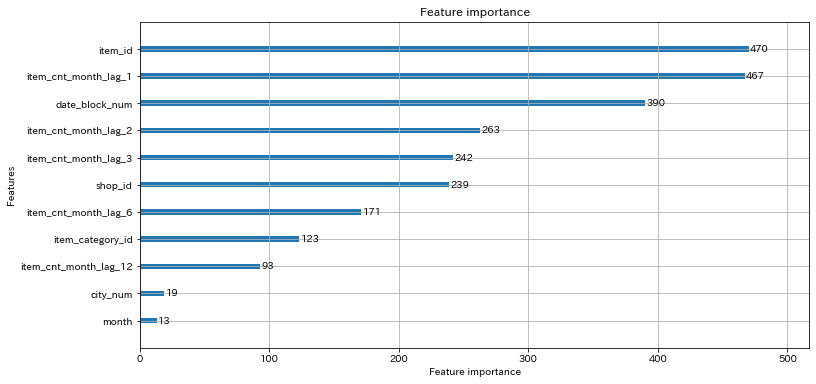

In [35]:
lightgbm.plot_importance(model, figsize=(12, 6))